In [ ]:
!pip install tensorflow opencv-python matplotlib seaborn scikit-learn


In [ ]:
import os

# Create folders
os.makedirs("BrainTumorProject/data", exist_ok=True)
os.makedirs("BrainTumorProject/models", exist_ok=True)
os.makedirs("BrainTumorProject/notebooks", exist_ok=True)
os.makedirs("BrainTumorProject/app", exist_ok=True)

print("Folders created!")


Folders created!


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving TUMOR.zip to TUMOR (1).zip


In [ ]:
import zipfile
import os

# Unzipping the uploaded file (replace with your actual filename if different)
with zipfile.ZipFile("TUMOR.zip", 'r') as zip_ref:
    zip_ref.extractall("BrainTumorDataset")


In [ ]:
os.listdir("BrainTumorDataset")


['TUMOR']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
BATCH_SIZE = 32


In [ ]:
# Rescale pixel values (0–255) to (0–1)
train_gen = ImageDataGenerator(rescale=1./255)
valid_gen = ImageDataGenerator(rescale=1./255)
test_gen  = ImageDataGenerator(rescale=1./255)

# Define paths to the folders inside extracted dataset
train_dir = "/content/BrainTumorDataset/TUMOR/train"
valid_dir = "/content/BrainTumorDataset/TUMOR/valid"
test_dir  = "/content/BrainTumorDataset/TUMOR/test"


# Load the data from folders
train_data = train_gen.flow_from_directory(train_dir,
                                           target_size=(IMG_SIZE, IMG_SIZE),
                                           batch_size=BATCH_SIZE,
                                           class_mode='categorical')

valid_data = valid_gen.flow_from_directory(valid_dir,
                                           target_size=(IMG_SIZE, IMG_SIZE),
                                           batch_size=BATCH_SIZE,
                                           class_mode='categorical')

test_data = test_gen.flow_from_directory(test_dir,
                                         target_size=(IMG_SIZE, IMG_SIZE),
                                         batch_size=BATCH_SIZE,
                                         class_mode='categorical')


Found 1695 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Found 246 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 222s 4s/step - accuracy: 0.5403 - loss: 1.1704 - val_accuracy: 0.7072 - val_loss: 0.7086
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 210s 4s/step - accuracy: 0.7946 - loss: 0.5208 - val_accuracy: 0.7968 - val_loss: 0.5310
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 218s 4s/step - accuracy: 0.8617 - loss: 0.3506 - val_accuracy: 0.8127 - val_loss: 0.5193
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 211s 4s/step - accuracy: 0.9060 - loss: 0.2591 - val_accuracy: 0.8466 - val_loss: 0.5445
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 211s 4s/step - accuracy: 0.9404 - loss: 0.1681 - val_accuracy: 0.8486 - val_loss: 0.5273
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 222s 4s/step - accuracy: 0.9578 - loss: 0.1013 - val_accuracy: 0.9044 - val_loss: 0.3939
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 213s 4s/step - accuracy: 0.9864 - loss: 0.0481 - val_accuracy: 0.9004 - val_loss: 0.4810
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 210s 4s/step - accuracy: 0.9862 - loss: 0.0480 - val_accuracy: 0.9004 - v

In [ ]:
loss, accuracy = model.evaluate(test_data)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")


8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 988ms/step - accuracy: 0.8706 - loss: 0.5297
Test Loss: 0.5737
Test Accuracy: 87.40%


In [ ]:
import numpy as np

# Get class labels
class_names = list(test_data.class_indices.keys())

# Predict and get actual labels
y_pred = model.predict(test_data)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = test_data.classes


8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step


              precision    recall  f1-score   support

      glioma       0.27      0.23      0.25        80
  meningioma       0.22      0.25      0.24        63
    no_tumor       0.17      0.18      0.18        49
   pituitary       0.18      0.19      0.18        54

    accuracy                           0.22       246
   macro avg       0.21      0.21      0.21       246
weighted avg       0.22      0.22      0.22       246



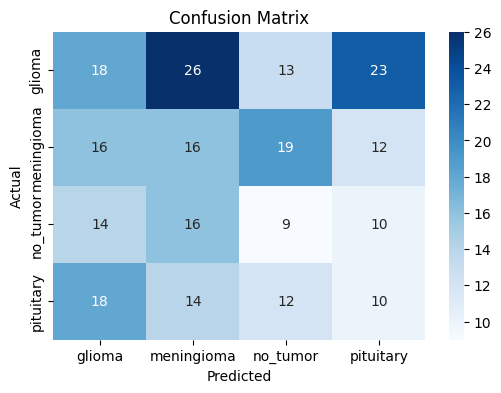

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Classification report
print(classification_report(y_true_labels, y_pred_labels, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
model.save("brain_tumor_model.h5")
print("Model saved as brain_tumor_model.h5")


Model saved as brain_tumor_model.h5


In [ ]:
from google.colab import files
files.download("brain_tumor_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(4, activation='softmax')(x)

transfer_model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
transfer_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])


In [ ]:
transfer_history = transfer_model.fit(train_data, validation_data=valid_data, epochs=10)


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.6033 - loss: 1.0126 - val_accuracy: 0.8267 - val_loss: 0.4792
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.8302 - loss: 0.4510 - val_accuracy: 0.8566 - val_loss: 0.3630
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.8799 - loss: 0.3370 - val_accuracy: 0.8606 - val_loss: 0.3294
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.8574 - loss: 0.3305 - val_accuracy: 0.8825 - val_loss: 0.3070
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.9090 - loss: 0.2509 - val_accuracy: 0.8984 - val_loss: 0.2835
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.9166 - loss: 0.2273 - val_accuracy: 0.9044 - val_loss: 0.2729
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.9134 - loss: 0.2079 - val_accuracy: 0.9044 - val_loss: 0.2821
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.9181 - loss: 0.2296 - val_accuracy: 0.8924 - va

In [ ]:
loss, accuracy = transfer_model.evaluate(test_data)
print(f"Transfer Learning Accuracy: {accuracy * 100:.2f}%")


8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8870 - loss: 0.3723
Transfer Learning Accuracy: 89.43%


In [ ]:
transfer_model.save("brain_tumor_transfer_model.h5")

from google.colab import files
files.download("brain_tumor_transfer_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Evaluate custom CNN
loss1, acc1 = model.evaluate(test_data)
print(f"Custom CNN Accuracy: {acc1 * 100:.2f}%")

# Evaluate transfer model
loss2, acc2 = transfer_model.evaluate(test_data)
print(f"MobileNetV2 Transfer Learning Accuracy: {acc2 * 100:.2f}%")


8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 900ms/step - accuracy: 0.8533 - loss: 0.5695
Custom CNN Accuracy: 87.40%
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9171 - loss: 0.2246
MobileNetV2 Transfer Learning Accuracy: 89.43%
